<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_2/blob/main/FILTRO_PASSA_BAIXAS_E_ESTIMA%C3%87%C3%83O_DE_ORDEM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import math
from IPython.display import (Audio)
from scipy import signal
%matplotlib inline

In [22]:
[fs,audio] = wav.read('fala-tom-alta-freq.wav')
SinalRuido = audio/max(abs(audio))
print("fs =",fs)
print('Áudio:')
display(Audio(SinalRuido, rate=fs, autoplay=False))

fs = 48000
Áudio:


<ipython-input-22-2d7d3b3a8e70>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [fs,audio] = wav.read('fala-tom-alta-freq.wav')


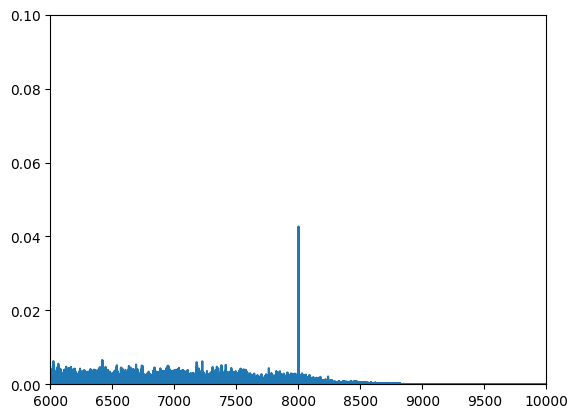

In [23]:
fourier = np.fft.fft(SinalRuido)
n = fourier.size
freq = np.fft.fftfreq(n, 1/fs)
plt.xlim(6000,10000)
plt.ylim(0,0.1)
plt.plot(freq,abs(fourier)*2/fs)

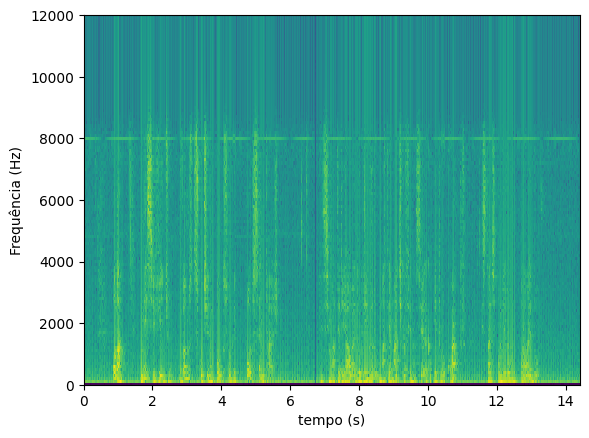

In [6]:
window_size = int(fs/100)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 12000])
plt.show()

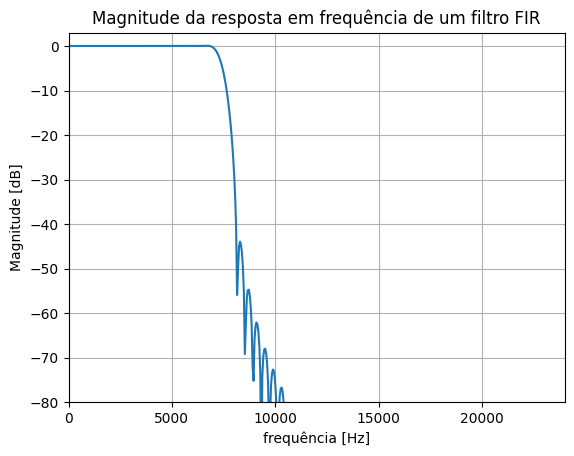

In [9]:
B = [3.6258893181999395e-06,5.752631815189215e-06,-1.909876540305034e-05,-6.210630456424987e-05,-5.4780526373972635e-05,5.520334165705544e-05,0.00019562247131974067,0.00018710873540342247,-6.63575955002064e-05,-0.00039399652115684644,-0.0004357009384712167,3.4130399235539263e-18,0.0006274709459512096,0.000821051544404384,0.0002020957206222873,-0.0008462788944207496,-0.0013456396295040568,-0.0005977760133621748,0.000982054295046367,0.0019894572062954135,0.0012379387275688388,-0.0009508853964199216,-0.002706966327531033,-0.002160102981997314,0.0006575314366810054,0.0034255839965875827,0.0033827963891057823,-5.454277728885368e-18,-0.004045420581081031,-0.004901383449875779,-0.0011267218750003205,0.00443944287032153,0.006685837093182548,0.002829606770961186,-0.004452324950494213,-0.008680777642074677,-0.00522219575323545,0.003894523858900799,0.010807887172849197,0.008440552088711592,-0.002524257871651456,-0.012970573929238617,-0.01268319126897812,1.0166601080459775e-17,0.01506053497323217,0.01830818828213894,0.0042446321677855016,-0.016965669078206944,-0.02609214403389095,-0.011365323483022547,0.018578646659932422,0.03806916800280929,0.024424616781481563,-0.01980536491838232,-0.06137558601862964,-0.05565552621051182,0.020572513211083342,0.14663874912559396,0.2644863549699944,0.31250320719644736,0.2644863549699944,0.146638749125594,0.020572513211083342,-0.05565552621051182,-0.06137558601862964,-0.01980536491838232,0.024424616781481567,0.038069168002809295,0.018578646659932422,-0.011365323483022551,-0.02609214403389095,-0.016965669078206944,0.004244632167785502,0.018308188282138944,0.01506053497323217,1.0166601080459776e-17,-0.012683191268978123,-0.012970573929238617,-0.002524257871651457,0.008440552088711594,0.010807887172849197,0.0038945238589008007,-0.005222195753235452,-0.008680777642074677,-0.004452324950494216,0.002829606770961187,0.006685837093182548,0.004439442870321533,-0.0011267218750003211,-0.004901383449875779,-0.004045420581081033,-5.4542777288853706e-18,0.0033827963891057823,0.0034255839965875853,0.0006575314366810059,-0.002160102981997314,-0.002706966327531036,-0.0009508853964199221,0.0012379387275688388,0.001989457206295417,0.0009820542950463675,-0.0005977760133621748,-0.0013456396295040592,-0.0008462788944207505,0.0002020957206222873,0.0008210515444043858,0.0006274709459512102,3.4130399235539263e-18,-0.00043570093847121824,-0.00039399652115684714,-6.63575955002064e-05,0.00018710873540342269,0.000195622471319741,5.520334165705544e-05,-5.478052637397282e-05,-6.210630456425018e-05,-1.909876540305034e-05,5.752631815189215e-06,3.6258893181999395e-06]
w, H = signal.freqz(B, 1)

# Plotando o filtro do pyFDA no Collab
plt.plot(fs/2 * w/np.pi , 20*np.log10(abs(H)))
plt.title('Magnitude da resposta em frequência de um filtro FIR')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.ylim([-80,3])
plt.xlim([0,fs/2])
plt.grid()
plt.show()

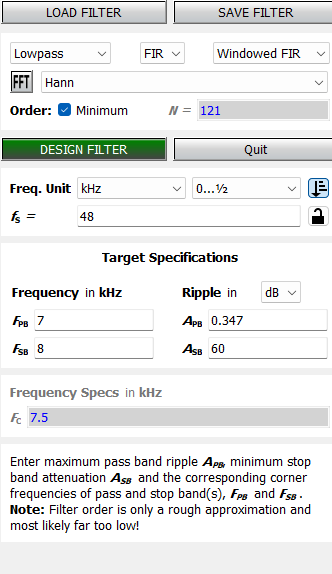

In [19]:
sinal_filtrado = signal.lfilter(B,1,SinalRuido)
sinal_filtrado = sinal_filtrado/max(abs(sinal_filtrado))
wav.write('audio-sem-ruido.wav',fs,sinal_filtrado)
display(Audio(sinal_filtrado, rate=fs, autoplay=False))

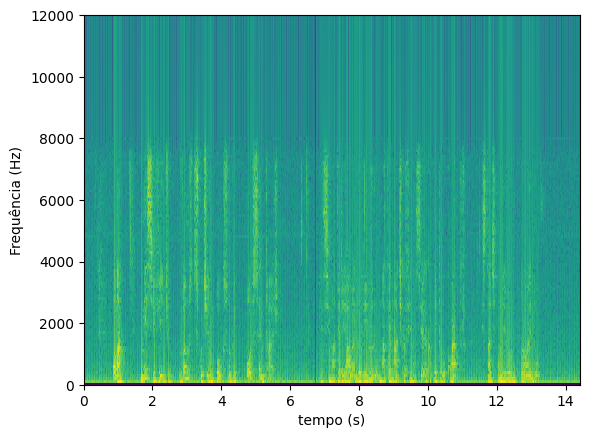

In [20]:
window_size = int(fs/100)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram(sinal_filtrado, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 12000])
plt.show()

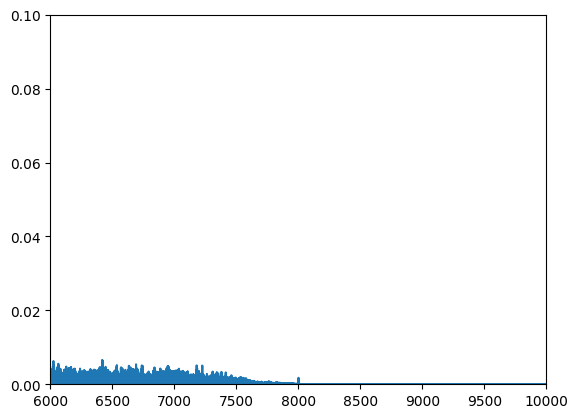

In [21]:
fourier = np.fft.fft(sinal_filtrado)
n = fourier.size
freq = np.fft.fftfreq(n, 1/fs)
plt.xlim(6000,10000)
plt.ylim(0,0.1)
plt.plot(freq,abs(fourier)*2/fs)